# Betrachtung des Zusammenhangs zwischen Quadergröße und Laufzeit

Von: Felix Schulze Sindern

Dieses Notebook ist Grundlage für das Kapitel 3.3 "Untersuchung Faktor Quadergröße (Felix Schulze Sindern)".
Es soll untersucht werden, welcher Zusammenhang zwischen Quadergröße und Laufzeit vorliegt.
Es wird vermutet, dass der Zusammenhang linear ist, dies gilt es zu prüfen.


In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
initial_data = pd.read_csv('../cuboid_size_measurements.csv')

## Fragestellung 1: Ist der Zusammenhang zwischen Quadergröße und Ausführungszeit linear?
Es wird vermutet, dass ein linearer Zusammenhang entsteht.

In [17]:
data1 = initial_data
data1['cell_count'] = (data1['length'] * data1['width'] * data1['height'])/1000 # Einheit ist tausend Zellen für bessere Lesbarkeit
data1 = data1.drop(['runName', 'length', 'width', 'height'], axis=1)
data1 = data1.groupby('cell_count').mean()
data_cols = data1.columns
data1['avg'] = data1.mean(axis=1)
data1 = data1.drop(data_cols, axis=1)

data1.reset_index(inplace=True)
data1

,cell_count,avg
0,125.000,129.03125
1,1000.000,380.78125
2,9938.375,3539.31250
3,19902.511,21990.81250
4,29791.000,32918.56250
5,39651.821,44325.21875
6,49836.032,61496.71875
7,59776.471,78560.50000
8,64000.000,80040.65625


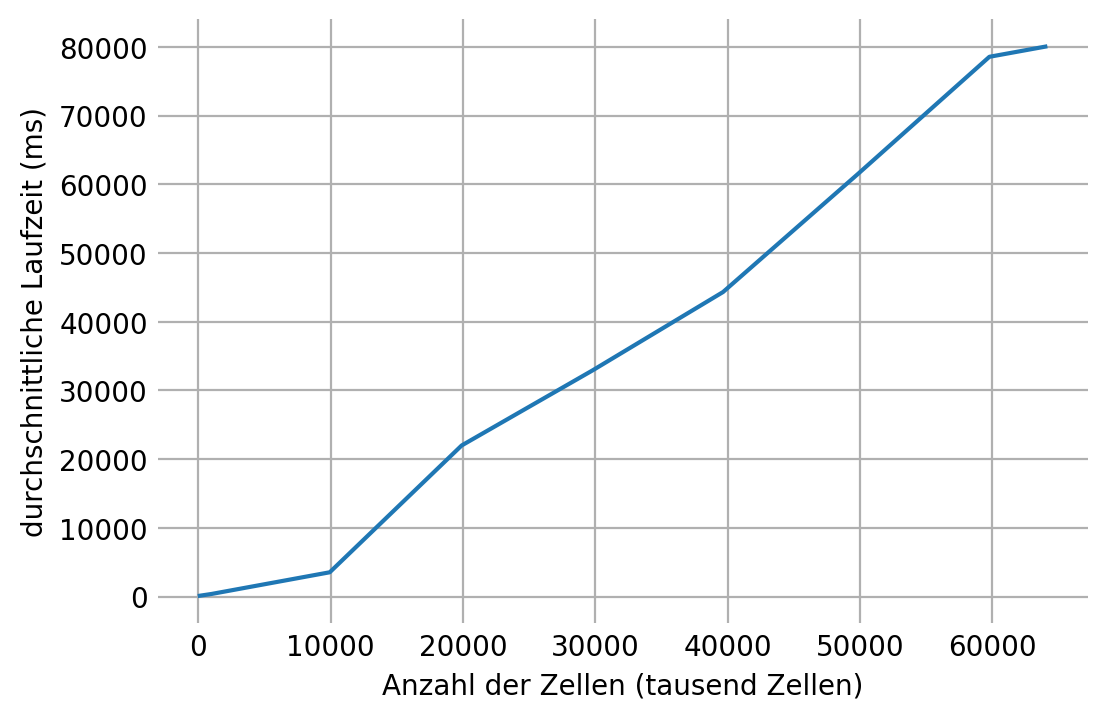

In [18]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.plot(data1['cell_count'], data1['avg'])
ax.set(ylabel='durchschnittliche Laufzeit (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [19]:
fig.savefig('cuboid_size_linear.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## Fragestellung 2: Wie ist der Zusammenhang zwischen Ausführungszeit pro Zellen und Quadergröße?

In [20]:
data2 = data1
data2['avg/cell'] = data2['avg']/data2['cell_count']
data2

,cell_count,avg,avg/cell
0,125.000,129.03125,1.032250
1,1000.000,380.78125,0.380781
2,9938.375,3539.31250,0.356126
3,19902.511,21990.81250,1.104927
4,29791.000,32918.56250,1.104983
5,39651.821,44325.21875,1.117861
6,49836.032,61496.71875,1.233981
7,59776.471,78560.50000,1.314238
8,64000.000,80040.65625,1.250635


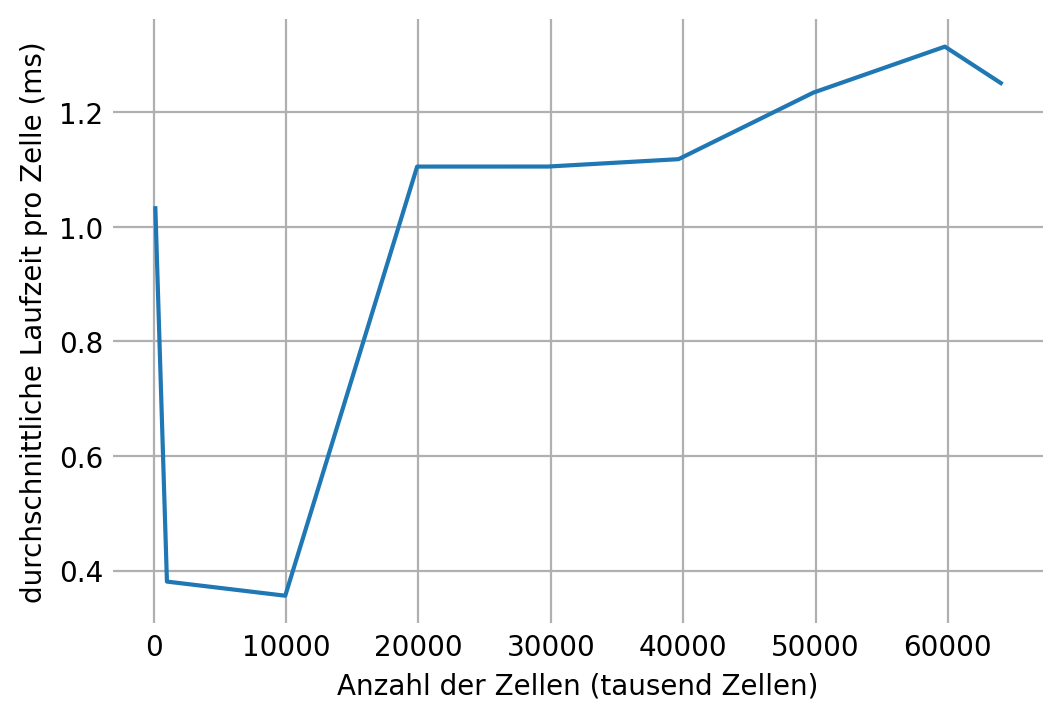

In [21]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.plot(data2['cell_count'], data2['avg/cell'])
ax.set(ylabel='durchschnittliche Laufzeit pro Zelle (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [22]:
fig.savefig('cuboid_size_linear_per_cell.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

# Fragestellung 3: Messe die Linearität des Zusammenhangs zwischen Zellenanzahl und Laufzeit mit einer Linearen Regression

In [23]:
from sklearn.linear_model import LinearRegression
data3 = data1

In [24]:
model = LinearRegression()
X = np.array(data3.cell_count).reshape(-1, 1)
y = np.array(data3.avg).reshape(-1, 1)
model.fit(X, y)
r_sq = model.score(X, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.9890316576249232
intercept: [-3993.88874801]
slope: [[1.31130941]]


In [25]:
prediction = model.predict(X)
data3['prediction'] = prediction
data3

,cell_count,avg,avg/cell,prediction
0,125.000,129.03125,1.032250,-3829.975071
1,1000.000,380.78125,0.380781,-2682.579333
2,9938.375,3539.31250,0.356126,9038.395956
3,19902.511,21990.81250,1.104927,22104.461301
4,29791.000,32918.56250,1.104983,35071.330023
5,39651.821,44325.21875,1.117861,48001.917437
6,49836.032,61496.71875,1.233981,61356.569202
7,59776.471,78560.50000,1.314238,74391.560448
8,64000.000,80040.65625,1.250635,79929.913788


In [26]:
print(f"Lineares Regression der Form: y = m * x + b")
model_formula = f"f(x) = {model.coef_[0][0]:.2f} * x + {model.intercept_[0]:.2f}"
print(f"Lineares Regression: {model_formula}")

Lineares Regression der Form: y = m * x + b
Lineares Regression: f(x) = 1.31 * x + -3993.89


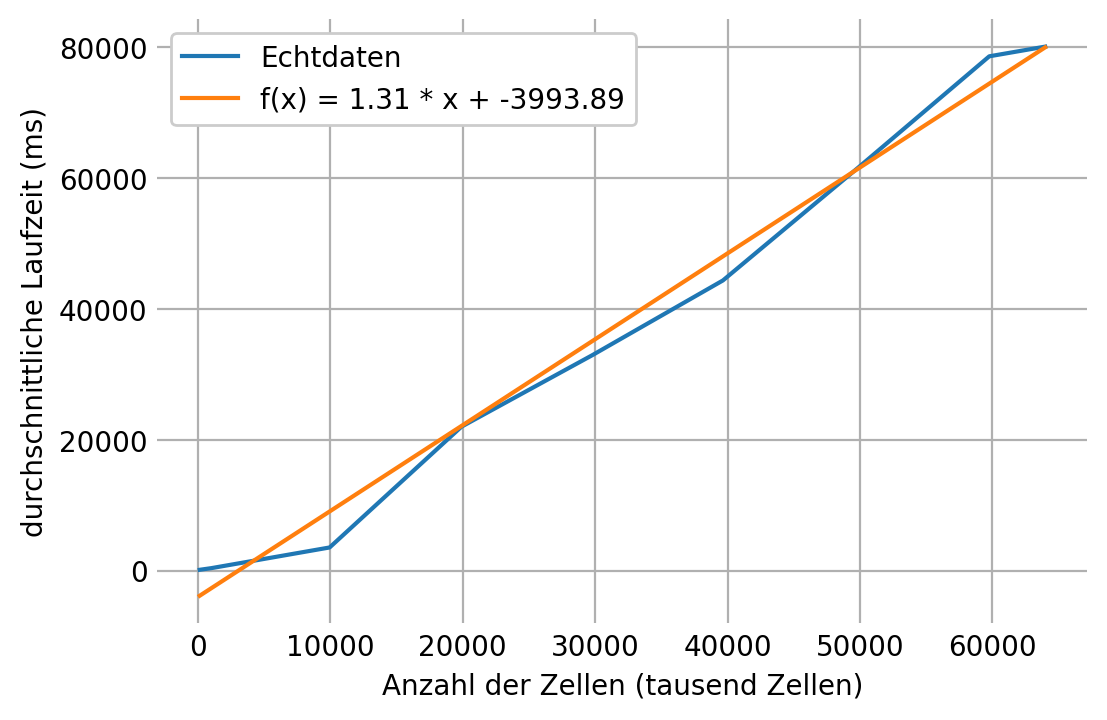

In [27]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot_real = ax.plot(data3['cell_count'], data3['avg'], label='Echtdaten')
bar_plot_predicted = ax.plot(data3['cell_count'], data3['prediction'], label=model_formula)
ax.set(ylabel='durchschnittliche Laufzeit (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')
ax.legend(framealpha=1)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [28]:
fig.savefig('cuboid_size_linear_with_regression.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')